<a href="https://colab.research.google.com/github/datanalyz3r/stat_sale_prediction/blob/main/sale_forecast_stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IF CODE RUNS IN GOOGLE COLAB, UPGRADE VERSIONS OF PANDAS AND XLRD FOR CORREСT WORK OF CODE
!pip install --upgrade pandas
!pip install --upgrade xlrd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#IF CODE RUNS IN GOOGLE COLAB, UPGRADE STATSMODELS FOR CORREСT WORK OF CODE
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
from pylab import *

In [ ]:
#CONNECT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#IMPORT LIABRARIES
import pandas as pd
import numpy as np
import os
import zipfile
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import feature_selection
import statsmodels.api as sm

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [ ]:
#ASSIGN TO VARIABLE PATH TO TRAIN DATA
my_direct = r"/content/gdrive/My Drive/PRJORD/"

In [ ]:
#CREATE FUNCTION FOR READ ALL EXCEL FILES FROM DIRRECTORY AND STACK IT IN ONE DATAFRAME
def read_and_collect(directory):
  timeless_df = pd.DataFrame()
  i = 0
  for a in os.listdir(directory):
    if i==0:
      df=pd.read_excel(directory+a)
      i+=1
    else:
      timeless_df = pd.read_excel(directory+a)
      df=pd.concat([df, timeless_df], ignore_index=True)
  return df

In [ ]:
a = read_and_collect(my_direct)

In [ ]:
#CREATE FUNCTION TO DELETE EMTY RAWS THAT SEPARATE CATEGORIES OF GOODS
def nadroper(df):
  ab= df[(pd.isna(a['Дата']) == True)].index
  df=df.drop(index=ab, axis=0)
  return df

In [ ]:
a = nadroper(a)

In [ ]:
#CREATE DATAFRAME COMPOSED FROM SALES AND MULTIPLY NUMBERS OF SALES AND NUMBERS OF GOODS ON (-1)
# IT'S DONE BECAUSE IN ORIGINAL TABLES IT HAS MINUS SIGN AND SHOWES THAT EXPENDED FROM THE BALANCE
sale = pd.DataFrame(a.groupby(['Тип']).get_group('Розничная продажа'))
sale['Сумма']=sale['Сумма']*(-1)
sale['Кол-во']=sale['Кол-во']*(-1)

#RESET INDEX OF DATAFRAME THAT THE RAWS ARE NUMBERED IN ORDER
sale=sale.reset_index()

In [ ]:
#DROP COLUMN CONTAINS OLD INDEX
sale=sale.drop(['index'], axis=1)

In [ ]:
#EDIT COLUMN CONTAINING TIME INFORMATION SEPARATE ONLY DATE
sale['Дата']=sale['Дата'].dt.date

In [ ]:
#GROUP DATA BY PRODUCTS
goods_groups=sale.groupby('Товар')

In [ ]:
#CREATE DATAFRAME CONTAINES INFORMATION ABOUT DAILY REVENUE
revenue_per_day=sale.groupby('Дата').sum()

<ipython-input-64-b633ed697e9a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  revenue_per_day=sale.groupby('Дата').sum()


In [ ]:
revenue_per_day

,index,Партия,Кол-во,Сумма
Дата,,,,
2022-02-01,37772495,0.0,2091.5,345939.75
2022-02-02,38667766,0.0,2287.0,403951.55
2022-02-03,44608053,0.0,2445.0,413884.19
2022-02-04,48171195,0.0,2894.5,477423.26
2022-02-05,36335184,0.0,2138.0,361101.14
...,...,...,...,...
2022-05-25,944678109,0.0,5762.0,1039640.58
2022-05-26,940930195,0.0,5711.0,1050251.06
2022-05-27,927204420,0.0,6195.0,1120069.90


Text(0, 0.5, 'Revenue')

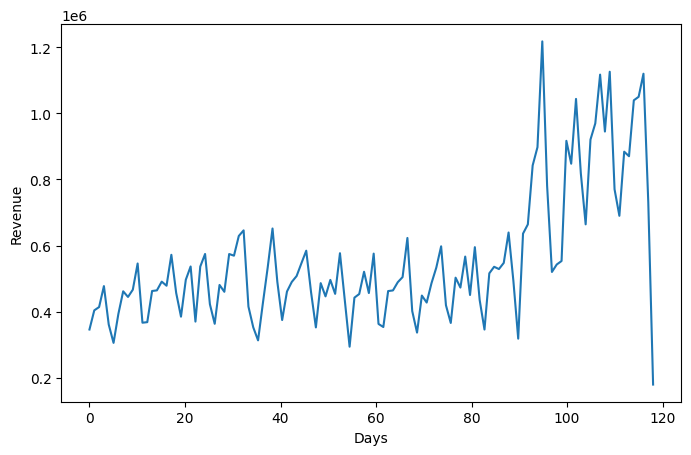

In [ ]:
#PLOTING DAILY REVENUE INFORMATION
plt.figure(figsize=(8,5),dpi=100)
plt.plot(np.linspace(0,118,118), revenue_per_day['Сумма'])
plt.xlabel('Days')
plt.ylabel('Revenue')

In [ ]:
#CREATE DICTIONARIES CONTAINES INFORMATION OF REVENUE AND NUMBER OF SALES PER DAY BY PRODUCTS
sales_dict={}
revenue_dict={}
for i in goods_groups.groups.keys():
  sales_dict[i]=goods_groups.get_group(i)['Кол-во'].sum()
  revenue_dict[i]=goods_groups.get_group(i)['Сумма'].sum()

In [ ]:
#TRANSFORM DICTIONARY TO PANDAS SERIES FOR USABILITY
sales_series=pd.Series(sales_dict)

In [ ]:
sales_series.sort_values(ascending=False)

Табачные Стики Heets Purple Label                         13648.0
Табачные Стики Heets Yellow / Slate Selection              8337.0
Табачные Стики Heets Turquoise Label                       7660.0
Табачные Стики Heets Amber Label                           7024.0
Табачные Стики Heets Green Zing                            4418.0
                                                           ...   
Жидкость Voodoo Salt Киви с клубникой 30мл 20мг strong        1.0
Табак трубочный W.O. Larsen 1864 100g                         1.0
Северный Ара Халва 25g                                        1.0
Табак трубочный W.O. Larsen Fine & Elegant                    1.0
Кальян Skyseven M10 Blue                                      1.0
Length: 5582, dtype: float64

In [ ]:
#TRANSFORM DICTIONARY TO PANDAS SERIES FOR USABILITY
revenue_series=pd.Series(revenue_dict)

In [ ]:
revenue_series.sort_values(ascending=False)

Табачные Стики Heets Purple Label                1976511.22
Табачные Стики Heets Yellow / Slate Selection    1208654.60
Табачные Стики Heets Turquoise Label             1112626.60
Табачные Стики Heets Amber Label                 1039881.83
Табачные Стики Heets Green Zing                   652454.71
                                                    ...    
Уплотнитель для шланга BLK                             0.02
Бумажки с фильтрами RAW Artesano King-Size             0.00
Гильзы T&T Economy 8.1/15mm 100шт                      0.00
Антон Is                                               0.00
Serbetli Ice Cranberry                                 0.00
Length: 5582, dtype: float64

In [ ]:
#TAKE FIRST FIVE BESTSELLERS
grouped_1=goods_groups.get_group('Табачные Стики Heets Purple Label').groupby('Дата')
grouped_2=goods_groups.get_group('Табачные Стики Heets Yellow / Slate Selection').groupby('Дата')
grouped_3=goods_groups.get_group('Табачные Стики Heets Turquoise Label').groupby('Дата')
grouped_4=goods_groups.get_group('Табачные Стики Heets Amber Label').groupby('Дата')
grouped_5=goods_groups.get_group('Табачные Стики Heets Green Zing').groupby('Дата')

<ipython-input-103-1e66e2d51c75>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(np.linspace(0,118,118), grouped_1.sum()['Кол-во'], label='Табачные Стики Heets Purple Label')
<ipython-input-103-1e66e2d51c75>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(np.linspace(0,118,118), grouped_2.sum()['Кол-во'], label='Табачные Стики Heets Yellow / Slate Selection')
<ipython-input-103-1e66e2d51c75>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns wh

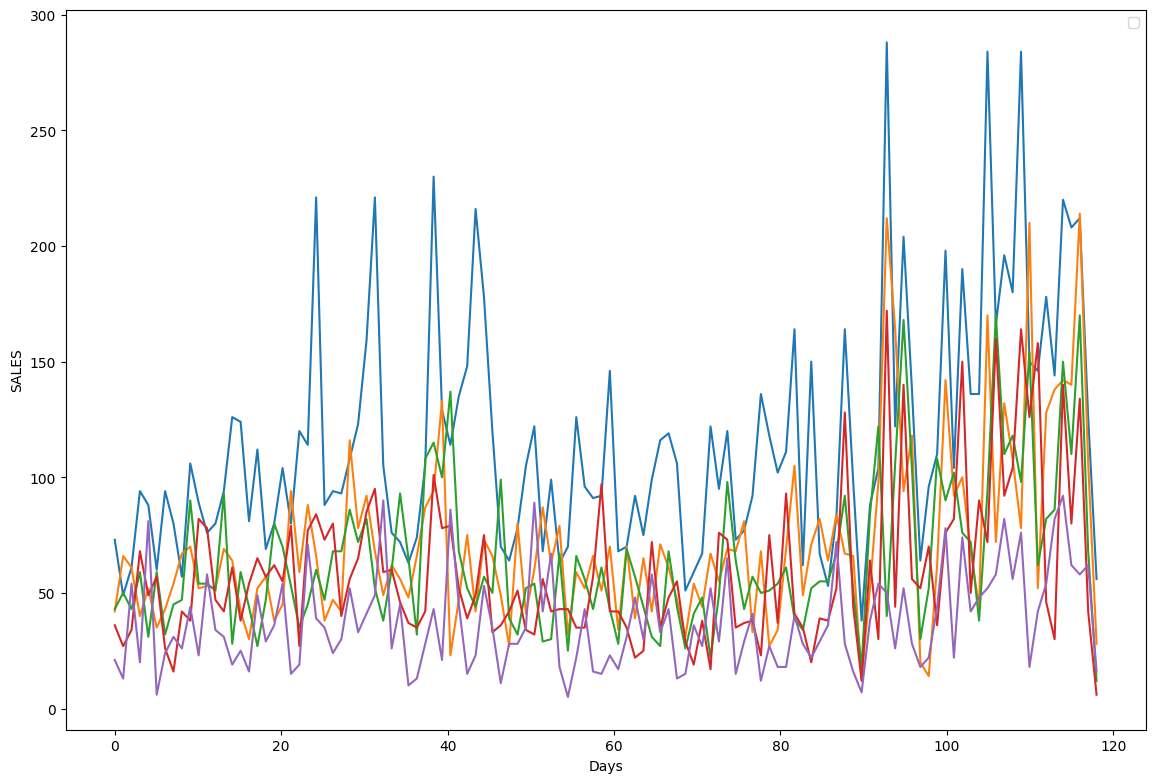

In [ ]:
#PLOT SALES PER DAY BY THIS PRODUCTS
figure_1=plt.figure(figsize=(12,8),dpi=100)
axes_1 = figure_1.add_axes([0.1,0.1,0.9,0.9])
plt.xlabel('Days')
plt.ylabel('SALES')
plt.plot(np.linspace(0,118,118), grouped_1.sum()['Кол-во'], label='Табачные Стики Heets Purple Label')
plt.plot(np.linspace(0,118,118), grouped_2.sum()['Кол-во'], label='Табачные Стики Heets Yellow / Slate Selection')
plt.plot(np.linspace(0,118,118), grouped_3.sum()['Кол-во'], label='Табачные Стики Heets Turquoise Label')
plt.plot(np.linspace(0,118,118), grouped_4.sum()['Кол-во'], label='Табачные Стики Heets Amber Label')
plt.plot(np.linspace(0,118,118), grouped_5.sum()['Кол-во'], label='Табачные Стики Heets Green Zing')


<ipython-input-105-1757902c3acf>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes_1 = figure_1.add_axes([0.1,0.1,0.9,0.9])
<ipython-input-105-1757902c3acf>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(np.linspace(0,118,118), grouped_1.sum()['Сумма'], label='Табачные Стики Heets Purple Label')
<ipython-input-105-1757902c3acf>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or 

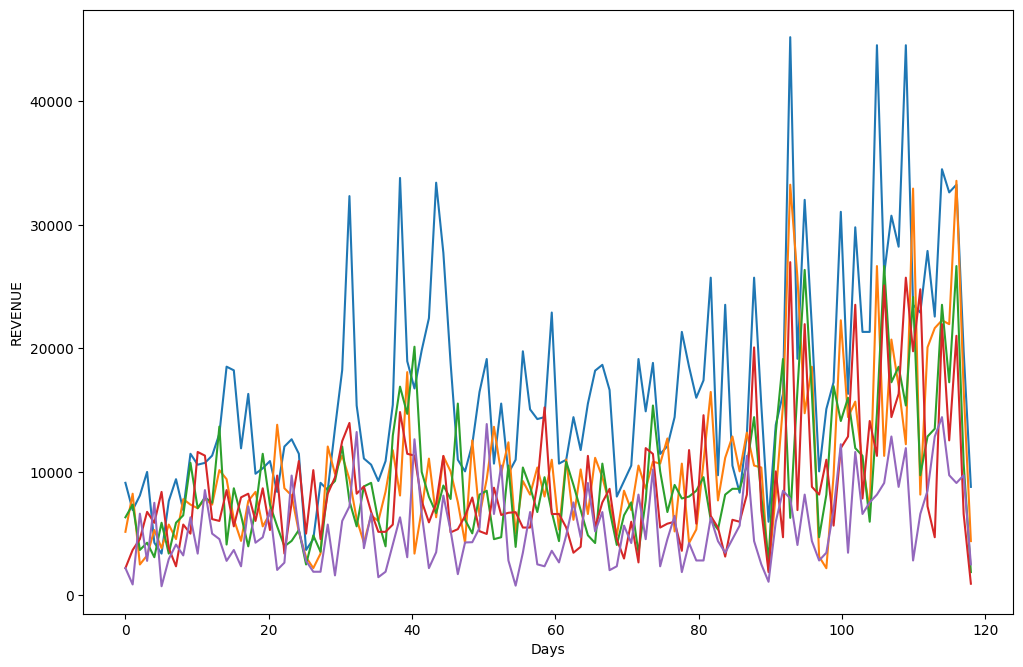

In [ ]:
#PLOT NUMBERS PER DAY BY THIS PRODUCTS
figure_2=plt.figure(figsize=(12,8),dpi=100)
axes_1 = figure_1.add_axes([0.1,0.1,0.9,0.9])
plt.xlabel('Days')
plt.ylabel('REVENUE')
plt.plot(np.linspace(0,118,118), grouped_1.sum()['Сумма'], label='Табачные Стики Heets Purple Label')
plt.plot(np.linspace(0,118,118), grouped_2.sum()['Сумма'], label='Табачные Стики Heets Yellow / Slate Selection')
plt.plot(np.linspace(0,118,118), grouped_3.sum()['Сумма'], label='Табачные Стики Heets Turquoise Label')
plt.plot(np.linspace(0,118,118), grouped_4.sum()['Сумма'], label='Табачные Стики Heets Amber Label')
plt.plot(np.linspace(0,118,118), grouped_5.sum()['Сумма'], label='Табачные Стики Heets Green Zing')

In [ ]:
n=0
for i in goods_groups.groups.keys():
  if goods_groups.get_group(i)['Сумма'].sum()>n:
    n=goods_groups.get_group(i)['Сумма'].sum()
    max_group_rev=goods_groups.get_group(i)

In [ ]:
prediction = fit_model.forecast(50)


In [ ]:
#ASSIGN TO VARIABLE PATH TO TEST DATA
test_data_dir = r"/content/gdrive/My Drive/VALSALE/"

In [ ]:
#DOING THE SAME ACTIONS FOR TEST DATA
b = read_and_collect(test_data_dir)

In [ ]:
b

In [ ]:
sale_test = pd.DataFrame(b.groupby(['Тип']).get_group('Розничная продажа'))
sale_test['Сумма']=sale_test['Сумма']*(-1)
sale_test['Кол-во']=sale_test['Кол-во']*(-1)
sale_test=sale_test.reset_index()

In [ ]:
sale_test

,index,Код,Артикул,Товар,Партия,Склад,Ед.изм.,Кол-во,Сумма,Тип,Номер,Контрагент,Дата,Комментарий
0,10,23875,NaN,Adalya 20g Blue Ice,NaN,ОСТАНКИНО,шт,1.0,107.0,Розничная продажа,20679,Розничный покупатель,2022-06-13 20:27:03,NaN
1,14,23948,NaN,Adalya 20g Blue Melon,NaN,АРГУНОВСКАЯ,Шт.,1.0,107.0,Розничная продажа,19832,Розничный покупатель,2022-06-10 10:04:16,NaN
2,26,23787,NaN,Adalya 20g Cherry,NaN,ВИДНОЕ,Шт.,1.0,107.0,Розничная продажа,23388,Розничный покупатель,2022-06-15 11:47:00,NaN
3,28,23787,NaN,Adalya 20g Cherry,NaN,ОСТАНКИНО,Шт.,1.0,107.0,Розничная продажа,19862,Розничный покупатель,2022-06-07 21:00:57,NaN
4,34,23789,NaN,Adalya 20g Citrus Fruits,NaN,АРГУНОВСКАЯ,Шт.,1.0,107.0,Розничная продажа,19925,Розничный покупатель,2022-06-10 18:30:21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34364,45526,20464,NaN,Электронный Испаритель Vozol D6 Рэдбулл-Яблоко...,NaN,ВЕРХНИЕ ЛИХОБОРЫ,шт,1.0,489.5,Розничная продажа,31173,Розничный покупатель,2022-06-03 18:22:11,NaN
34365,45527,19229,NaN,Электронный Испаритель Woodu Pod 1200 Арбуз,NaN,ЛЕНИНСКИЙ,шт,1.0,410.0,Розничная продажа,13343,Розничный покупатель,2022-06-08 11:52:01,NaN
34366,45529,19540,NaN,Электронный Испаритель Woodu Pod 1200 Банан Айс,NaN,ЛЕНИНСКИЙ,Шт.,1.0,410.0,Розничная продажа,13051,Розничный покупатель,2022-06-05 13:26:58,NaN
34367,45533,19815,NaN,Электронный Испаритель Woodu Pod 1200 Персик Айс,NaN,ЛЕНИНСКИЙ,Шт.,1.0,459.2,Розничная продажа,12577,Розничный покупатель,2022-05-31 15:34:21,NaN


In [ ]:
sale_test=sale_test.drop(['index'], axis=1)

In [ ]:
sale_test['Дата']=sale_test['Дата'].dt.date

In [ ]:
goods_groups_test=sale_test.groupby('Товар')
revenue_per_day_test=sale_test.groupby('Дата').sum()

<ipython-input-112-5b78067a5020>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  revenue_per_day_test=sale_test.groupby('Дата').sum()


In [ ]:
#PREDICT FUTURE SALES USING EXPONENTIALSMOOTHING
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fit_model = ExponentialSmoothing(revenue_per_day['Сумма'],
                                  trend='add',
                                  seasonal='add',
                                  seasonal_periods=14).fit()

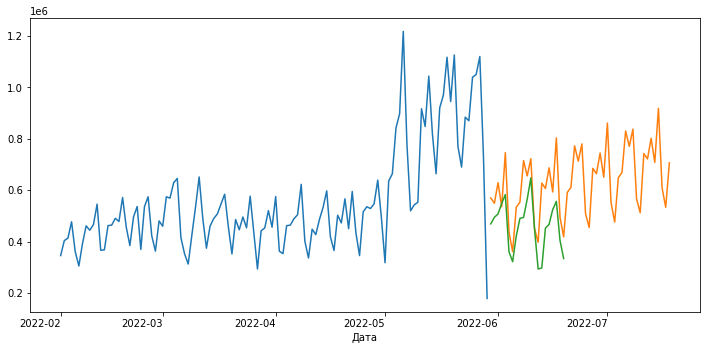

In [ ]:
#PLOT TRAIN DATA(BLUE), TEST DATA(GREEN) AND PREDICTIONS (ORANGE)
revenue_per_day['Сумма'].plot(figsize=(12,6))
prediction.plot()
revenue_per_day_test['Сумма'].plot()

In [ ]:
#PREDICT FUTURE SALES USING AUTOREGRESSION
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
model = AutoReg(revenue_per_day['Сумма'], 30)
model_fit = model.fit()
train_model = AutoReg(revenue_per_day['Сумма'], 18).fit(cov_type="HC0")

In [ ]:
prediction = train_model.predict(start=len(revenue_per_day['Сумма']), end=len(revenue_per_day_test['Сумма'])+len(revenue_per_day['Сумма']), dynamic=True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/deterministic.py:141: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(index, pd.Int64Index) and np.all(np.diff(index) == 1):
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


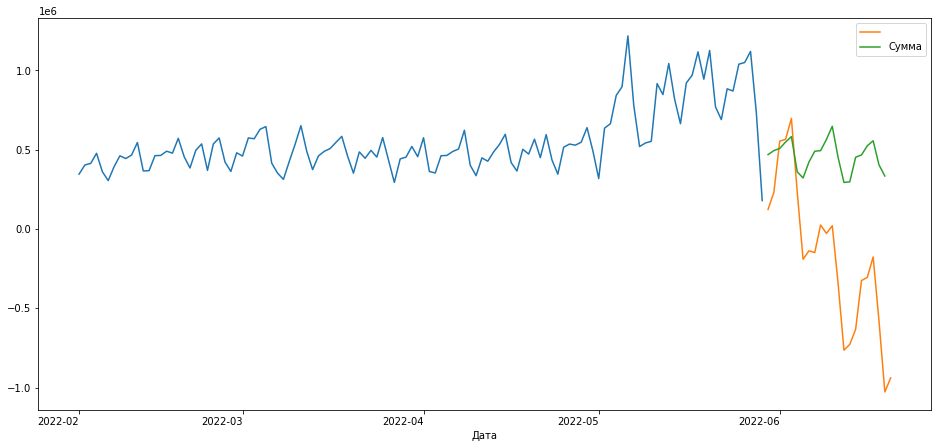

In [ ]:
#PLOT TRAIN DATA(BLUE), TEST DATA(GREEN) AND PREDICTIONS (ORANGE)
revenue_per_day['Сумма'].plot(figsize=(16,8))
prediction.plot(legend=True)
revenue_per_day_test['Сумма'].plot(legend=True)

In [ ]:
#PREDICT FUTURE SALES USING SARIMAX MODEL
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(revenue_per_day['Сумма'], order=(0, 1, 3),
               seasonal_order=(1, 0, 1, 12))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


In [ ]:
res = model.fit()

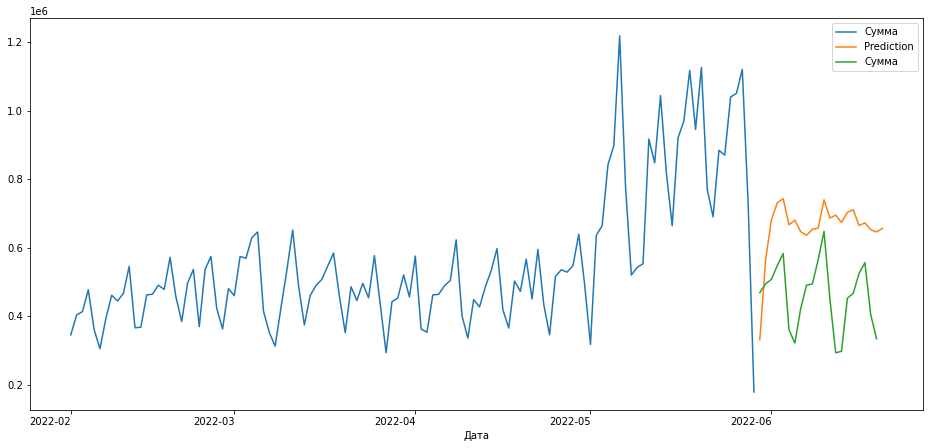

In [ ]:
#PLOT TRAIN DATA(BLUE), TEST DATA(GREEN) AND PREDICTIONS (ORANGE)
prediction = res.predict(start=len(revenue_per_day['Сумма']), end=len(revenue_per_day_test['Сумма'])+len(revenue_per_day['Сумма']), 
                         typ='linear').rename('Prediction')
revenue_per_day['Сумма'].plot(legend=True, figsize=(16,8))
prediction.plot(legend=True)
revenue_per_day_test['Сумма'].plot(legend=True)